# Práctica 1: Parte A
### Itziar López Almagro y Adrian Carlos Skaczylo 



En esta parte la practica procedemos a analizar el dataset titanic.csv. Dicho dataseet contiene los siguientes atributos:
| **Variable**   | **Descripción**                                                                 | **Valores**                                  |
|----------------|---------------------------------------------------------------------------------|----------------------------------------------|
| **PassengerId** | Identificador único de cada pasajero.                                           | Numérico                                     |
| **Survived**    | Indica si el pasajero sobrevivió (1) o no (0).                                  | 0, 1                                         |
| **Pclass**      | Clase del billete del pasajero                                                  | 1 = Primera clase, 2 = Segunda clase, 3 = Tercera clase |
| **Name**        | Nombre completo del pasajero.                                                   | Texto               |
| **Sex**         | Género del pasajero                                                             | Male, Female                           |
| **Age**         | Edad del pasajero en años. Puede contener valores nulos.                        | Numérico(puede contener nulos)                          |
| **SibSp**       | Número de hermanos o cónyuges que viajaban con el pasajero.                     |  Numérico                            |
| **Parch**       | Número de padres o hijos que viajaban con el pasajero.                          |  Numérico                                 |
| **Ticket**      | Código del billete del pasajero.                                                | Texto                 |
| **Fare**        | Tarifa pagada por el billete.                                                   | Numérico                      |
| **Cabin**       | Número de la cabina en la que se alojó el pasajero                              | Texto (puede contener nulos)                   |
| **Embarked**    | Puerto en el que el pasajero abordó el Titanic                                  | "C" = Cherburgo, "Q" = Queenstown, "S" = Southampton |



In [ ]:
#Instalar en caso de ser necesario
!pip install pandas 
!pip install numpy

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
#Creamos el dataframe a partir del datasheet
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Una vez tenemeos el dataframe es importante "quitar ruido". Para ello vamos a eliminar aquellas instancias repetidas y que tengan algun valor **nulo**

In [18]:
#Eliminar datos con valores nulos
df_sin_nulos = df.dropna()
num_inst_eliminadas = len(df)-len(df_sin_nulos)
df = df_sin_nulos

#Eliminar duplicados
num_duplicados = df.duplicated().sum()
df = df.drop_duplicates()
df=df.reset_index(drop=True) #reajustamos la indexacion de las filas
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
178,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
179,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
180,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
181,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


Vemos que el numero de filas eliminadas  y duplicadas ha sido respectivamente:

In [19]:
num_inst_eliminadas,num_duplicados #708 y 0

(708, np.int64(0))

## ¿En que beneficia su eliminación ?

## ¿Atributos útiles?
Observamos que las variables **Name**, **Ticket**,**PassengerId** y **Cabin** no aportan información relevante a nivel global. En términos generales, estos atributos solo contienen información particular, sin contribuir al análisis general del conjunto de datos.Procedemos a quitarlas del dataframe:

In [20]:
df = df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1) #Axis = 1 = columna
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,female,38.0,1,0,71.2833,C
1,1,1,female,35.0,1,0,53.1000,S
2,0,1,male,54.0,0,0,51.8625,S
3,1,3,female,4.0,1,1,16.7000,S
4,1,1,female,58.0,0,0,26.5500,S
...,...,...,...,...,...,...,...,...
178,1,1,female,47.0,1,1,52.5542,S
179,0,1,male,33.0,0,0,5.0000,S
180,1,1,female,56.0,0,1,83.1583,C
181,1,1,female,19.0,0,0,30.0000,S


## Diagramas de Dispersión y Coeficiente de Correlación

En este apartado vamos a realizar el estudio de la relacion entre pares de variables numéricas.Para ello vamos a calcular el coeficiente de correlacion entre dos variables X e Y. Dicho coeficiente toma valores entre $-1$ y $1$, donde valores muy cercamos a $1$ significa una relacion directamente proporcional, y valores muy proximos a $-1$ una relacion inversamente proporcional.


In [26]:
#Seleccionamos las variables numericas
variables_numericas = df.columns.difference(['Sex','Embarked']) 
variables_numericas
df_numerico = df.loc[:,variables_numericas]

#Calculamos coeficientes de correlacion
df_numerico.corr().transpose()

,Age,Fare,Parch,Pclass,SibSp,Survived
Age,1.000000,-0.092424,-0.271271,-0.306514,-0.156162,-0.254085
Fare,-0.092424,1.000000,0.389740,-0.315235,0.286433,0.134241
Parch,-0.271271,0.389740,1.000000,0.047496,0.255346,0.023582
Pclass,-0.306514,-0.315235,0.047496,1.000000,-0.103592,-0.034542
SibSp,-0.156162,0.286433,0.255346,-0.103592,1.000000,0.106346
Survived,-0.254085,0.134241,0.023582,-0.034542,0.106346,1.000000


En esta tabla observamos directamente que no existe relación alguna entre las variables númericas pues ningun coeficiente toma valores cercanos a $1$ o $-1$. (Obviamente la diagonal no se tiene en cuenta)

Además podemos verlo de manera mas visual dibujando los diagramas de dispersión.Para ello vamos a dibujar la matriz de diagramas de dispersion 

<function matplotlib.pyplot.show(close=None, block=None)>

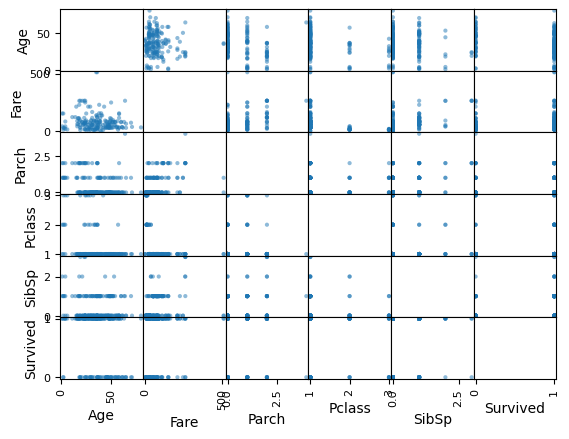

In [50]:
pd.plotting.scatter_matrix(df_numerico,diagonal='off')
plt.show


Ninguno de los diagramas sigue un "patrón", por lo que no estan relacionadas

### Estadísticas


In [47]:
df_numerico.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,183.0,35.674426,15.643866,0.92,24.0,36.0,47.5,80.0000
Fare,183.0,78.682469,76.347843,0.00,29.7,57.0,90.0,512.3292
Parch,183.0,0.475410,0.754617,0.00,0.0,0.0,1.0,4.0000
Pclass,183.0,1.191257,0.515187,1.00,1.0,1.0,1.0,3.0000
SibSp,183.0,0.464481,0.644159,0.00,0.0,0.0,1.0,3.0000
Survived,183.0,0.672131,0.470725,0.00,0.0,1.0,1.0,1.0000


### Variables Categóricas


Sin embargo, vemos que todavía hay variables categóricas: **Female** y **Embarked**. Por lo que hemos decidido hacer un mapeo para convertirlas en variables numéricas:

- Para la variable **Sex**:
    - $$\text{male} = 0$$
    - $$\text{female} = 1$$

- Para la variable **Embarked**:
    - $$\text{C} = 0$$
    - $$\text{Q} = 1$$
    - $$\text{S} = 2$$